In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
# 결측치 확인하는 라이브러리
import missingno as msno

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [63]:
os.getcwd() #현재 작업 위치 출력

'C:\\Users\\정가경\\python_start'

In [304]:
bike = pd.read_csv("C:/Users/정가경/Downloads/train (2).csv",encoding = 'EUC-KR')
df = bike.copy()
df.columns=['날짜','자전거 대여량','시간','온도','습도','풍속','가시성','이슬점','태양복사','강수량','강설량','계절','공휴일','사용가능일']

# 전체 데이터 확인하기

In [305]:
df.describe()

,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [306]:
df['날짜']=pd.to_datetime(df['날짜'],dayfirst=True)
df=df.sort_values(['날짜','시간'])
df=df.reset_index()
df=df.drop('index',axis=1)
df.head()

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### 데이터에 있는 변수들의 정보 확인하기

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       7008 non-null   datetime64[ns]
 1   자전거 대여량  7008 non-null   int64         
 2   시간       7008 non-null   int64         
 3   온도       6306 non-null   float64       
 4   습도       7008 non-null   int64         
 5   풍속       6303 non-null   float64       
 6   가시성      7008 non-null   int64         
 7   이슬점      7008 non-null   float64       
 8   태양복사     7008 non-null   float64       
 9   강수량      7008 non-null   float64       
 10  강설량      7008 non-null   float64       
 11  계절       6309 non-null   object        
 12  공휴일      7008 non-null   object        
 13  사용가능일    7008 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(4), object(3)
memory usage: 766.6+ KB


### 결측치 확인하기

In [308]:
df.isna().sum()

날짜           0
자전거 대여량      0
시간           0
온도         702
습도           0
풍속         705
가시성          0
이슬점          0
태양복사         0
강수량          0
강설량          0
계절         699
공휴일          0
사용가능일        0
dtype: int64

<Axes: >

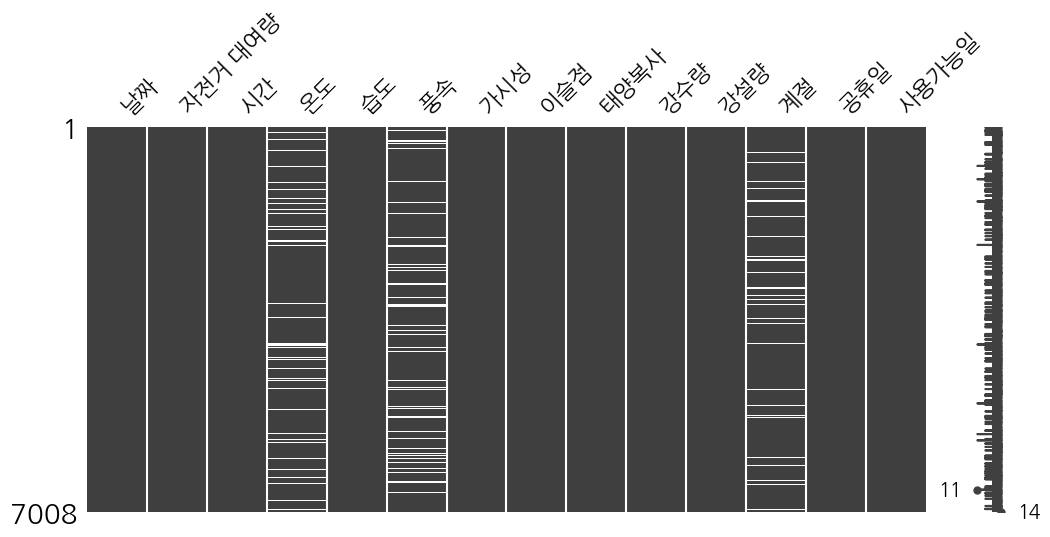

In [309]:
msno.matrix(df, figsize=(12,5))

### 전체값이 전부 na인 열 삭제하기

In [310]:
df.dropna(axis=1,how='all')

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,NaN,No Holiday,Yes
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


### 계절 결측치 채우기

경험적으로 각 달이 어떤 계절에 속하는 지 확인해보고 각 달에 그에 맞는 계절을 할당한다.

In [311]:
for i in range(1,13):
    print(df.loc[df['날짜'].dt.month==i]['계절'])

594     Winter
595     Winter
596     Winter
597     Winter
598     Winter
         ...  
1205    Winter
1206    Winter
1207    Winter
1208    Winter
1209    Winter
Name: 계절, Length: 616, dtype: object
1210    Winter
1211    Winter
1212    Winter
1213    Winter
1214    Winter
         ...  
1745    Winter
1746    Winter
1747    Winter
1748    Winter
1749    Winter
Name: 계절, Length: 540, dtype: object
1750    Spring
1751    Spring
1752    Spring
1753    Spring
1754    Spring
         ...  
2315    Spring
2316       NaN
2317    Spring
2318    Spring
2319    Spring
Name: 계절, Length: 570, dtype: object
2320    Spring
2321    Spring
2322    Spring
2323    Spring
2324    Spring
         ...  
2885    Spring
2886    Spring
2887    Spring
2888    Spring
2889    Spring
Name: 계절, Length: 570, dtype: object
2890    Spring
2891    Spring
2892       NaN
2893    Spring
2894    Spring
         ...  
3472    Spring
3473       NaN
3474    Spring
3475    Spring
3476    Spring
Name: 계절, Length: 587, dtyp

12,1,2 : 겨울  
3,4,5 : 봄  
6,7,8: 여름  
9,10,11 : 가을  

In [312]:
df.loc[df['날짜'].dt.month.isin([12,1,2]),'계절'] = 'Winter'
df.loc[df['날짜'].dt.month.isin([3,4,5]),'계절'] = 'Spring'
df.loc[df['날짜'].dt.month.isin([6,7,8]),'계절'] = 'Summer'
df.loc[df['날짜'].dt.month.isin([9,10,11]),'계절'] = 'Autumn'
df['계절'].isna().sum()

0

### 온도 결측치 채우기

지난 주 과제에서 복잡해서 행하지 않은 습도와 이슬점을 통해서 온도 결측치를 채우는 방법을 해보려고 한다.

In [214]:
natemp = df.loc[df['온도'].isna()==True]
natemp.reset_index(drop=True, inplace=True)
natemp

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일,월
0,2017-12-01,181,6,NaN,35,1.300000,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,930,8,NaN,37,1.100000,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,405,21,NaN,81,0.800000,1687,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,398,22,NaN,83,1.500000,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,323,23,NaN,84,1.623174,1265,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,2018-11-28,675,14,NaN,14,1.100000,1880,-16.1,1.70,0.0,0.0,Autumn,No Holiday,Yes,11
698,2018-11-29,645,13,NaN,26,2.100000,1604,-12.7,0.21,0.0,0.0,Autumn,No Holiday,Yes,11
699,2018-11-29,1577,18,NaN,46,0.900000,1566,-4.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,11
700,2018-11-29,559,23,NaN,56,1.900000,1394,-5.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,11


In [215]:
len(natemp)

702

In [216]:
def calculate_temperature(dew_point, humidity):
    # 상수 정의
    a = 17.27
    b = 237.7

    # 이슬점을 이용한 온도 계산
    numerator = dew_point
    denominator = 1 - ( (100 - humidity) / 100 ) * ( (a * dew_point) / (b + dew_point) )

    temperature = numerator / denominator - b

    return temperature

In [217]:
for i in range(len(natemp)):
    dew_point = natemp.loc[i, '이슬점']
    humidity = natemp.loc[i, '습도']
    natemp.loc[i, '온도'] = calculate_temperature(dew_point, humidity)

In [218]:
calculate_temperature(15.8,64)

-211.90399690239292

상대습도와 이슬점을 이용해서 온도를 구하려고 시도했는데 값이 말이 안돼서 주어진 데이터를 가지고 test해봤더니 제대로된 온도값이 나오지 않았다. 내 생각에는 온도와 이슬점을 가지고 상대습도를 구하는 공식에서 exp이 사용되는데 log로 변환하는 과정에서 - 값을 다룰 수 없어서 계산이 제대로 되지 않는 것 같다. 그래서 해당 방법은 더 이상 진행하지 않도록 하였다. 

온도와 풍속이 시계열 데이터이기 때문에 지난 주 과제에서 앞뒤 행의 풍속의 중앙값을 택하면 풍속을 예측할 수 있을 것이라고 생각했다. 하지만 시계열 데이터의 결측값을 처리하는데는 더 다양한 방식이 있다는 것을 알았다. interpolate 함수를 이용해서 결측값을 채우는 것에는 더 다양한 방식이 존재할 수 있다. 일단 그 전에 온도의 데이터 형태를 확인하고자 한다.

In [313]:
#시계열 데이터인만큼 월별로 나눠서 보고자 한다.
df['월'] = df['날짜'].dt.month

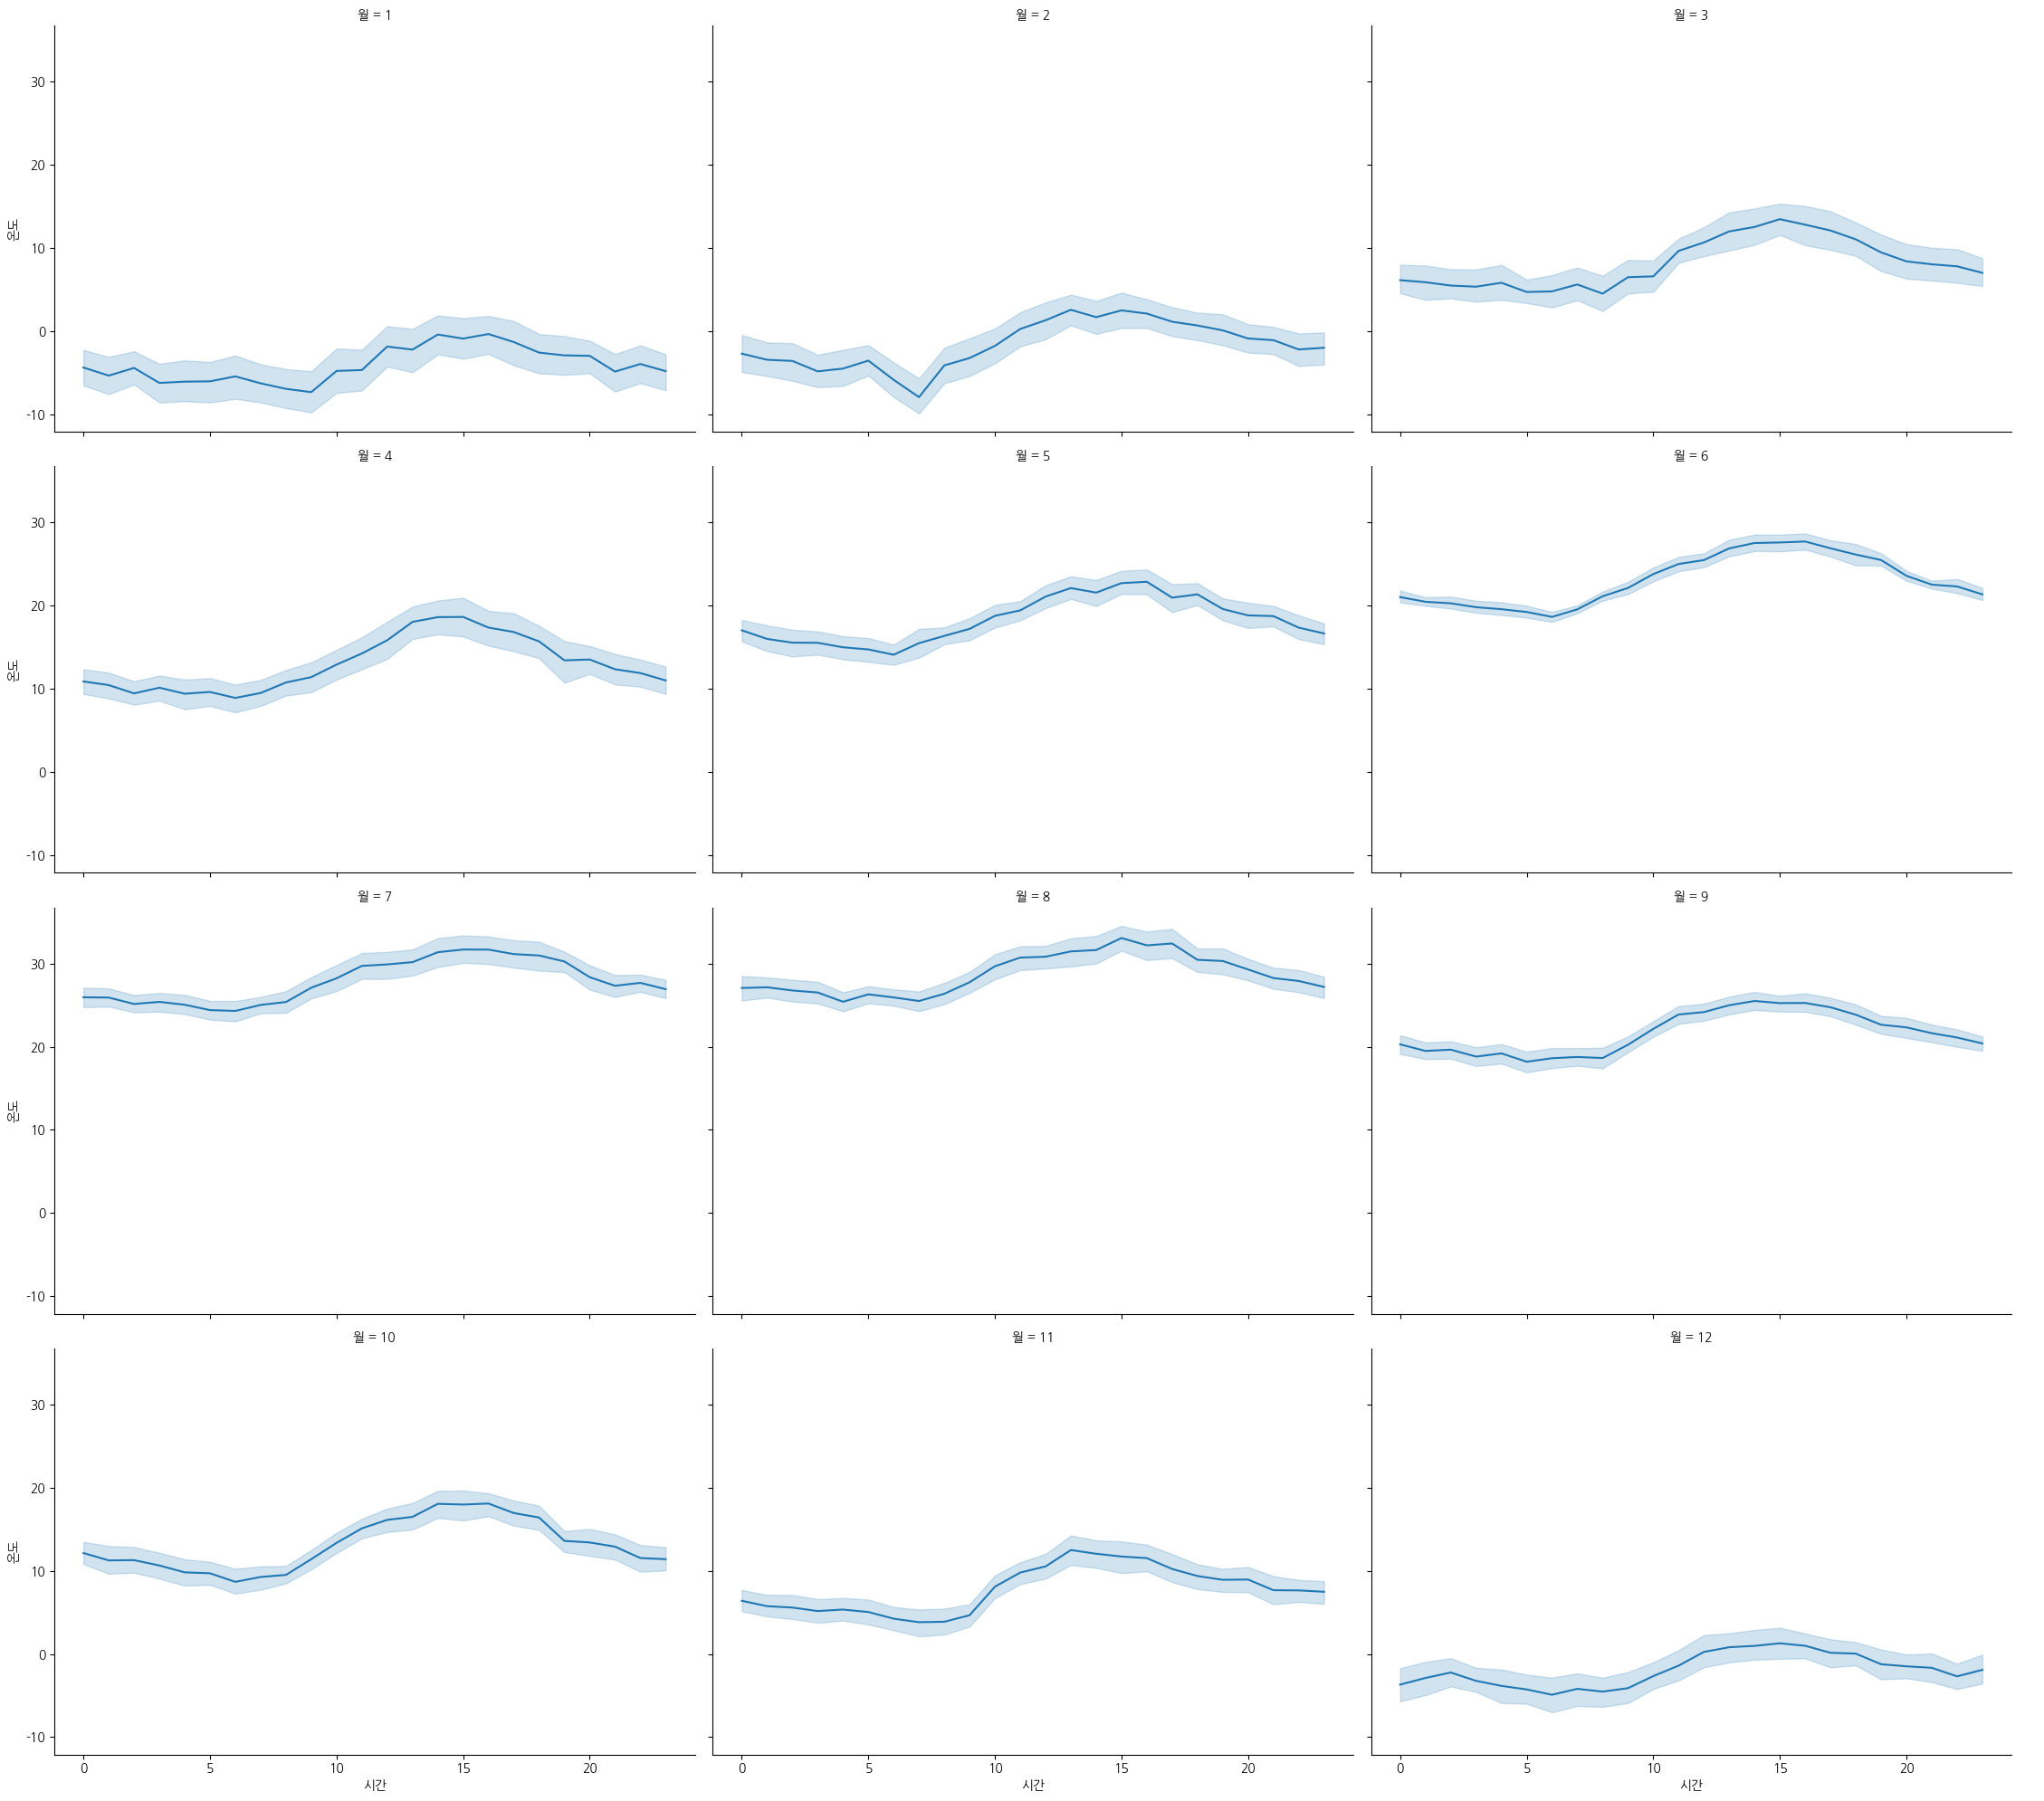

In [314]:
# FacetGrid 객체 생성
g = sns.FacetGrid(df, col="월", col_wrap=3, height=5, aspect=1.5)

# 각 서브플롯에 lineplot 적용
g.map(sns.lineplot, "시간", "온도")

# x,y 이름 정하기
g.set_axis_labels("시간", "온도")

#  내가 만든 서브플랏들을 적용하기
g.add_legend()

# 그래프 보여주기
plt.show()


![Sample Image](https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTA2MDFfOTEg%2FMDAxNjIyNTM5OTM2MzE3.0yCioHx66sNbkKlUJ4Fi9XvdIBXsa-INF6WFWHjArDAg.xHToYXicVaDOEuHYFBFD4ky9p68QEopTKvpSzcewWe4g.PNG.happy-das%2Fimage.png&type=sc960_832)

전체적으로 연속되면서 직선의 형태보다는 곡선에 좀 더 가까운 형태를 띄고 있다. interpolate함수의 method들 중에서 spline이라는 method가 존재한다. spline method는 위의 그림과 같이 모든 점을 지나는 가상 함수를 사용하는 것이 아니라 함수를 짧은 구간으로 나누어 보간하는 방법이다. 기본적으로 두 개의 점을 잇는 저차 함수를 가정하고 이를 매 두 점마다 구현하는 방식이다. 따라서 나는 온도 그래프를 스플라인 보간법을 이용해서 보간해보고자 하는데 1차는 저번주에 해보았으니 좀더 유연하게 예측할 수 있는 3차로 해보고자 한다.

In [315]:
df['온도'].interpolate(method='spline', order=3, inplace=True)

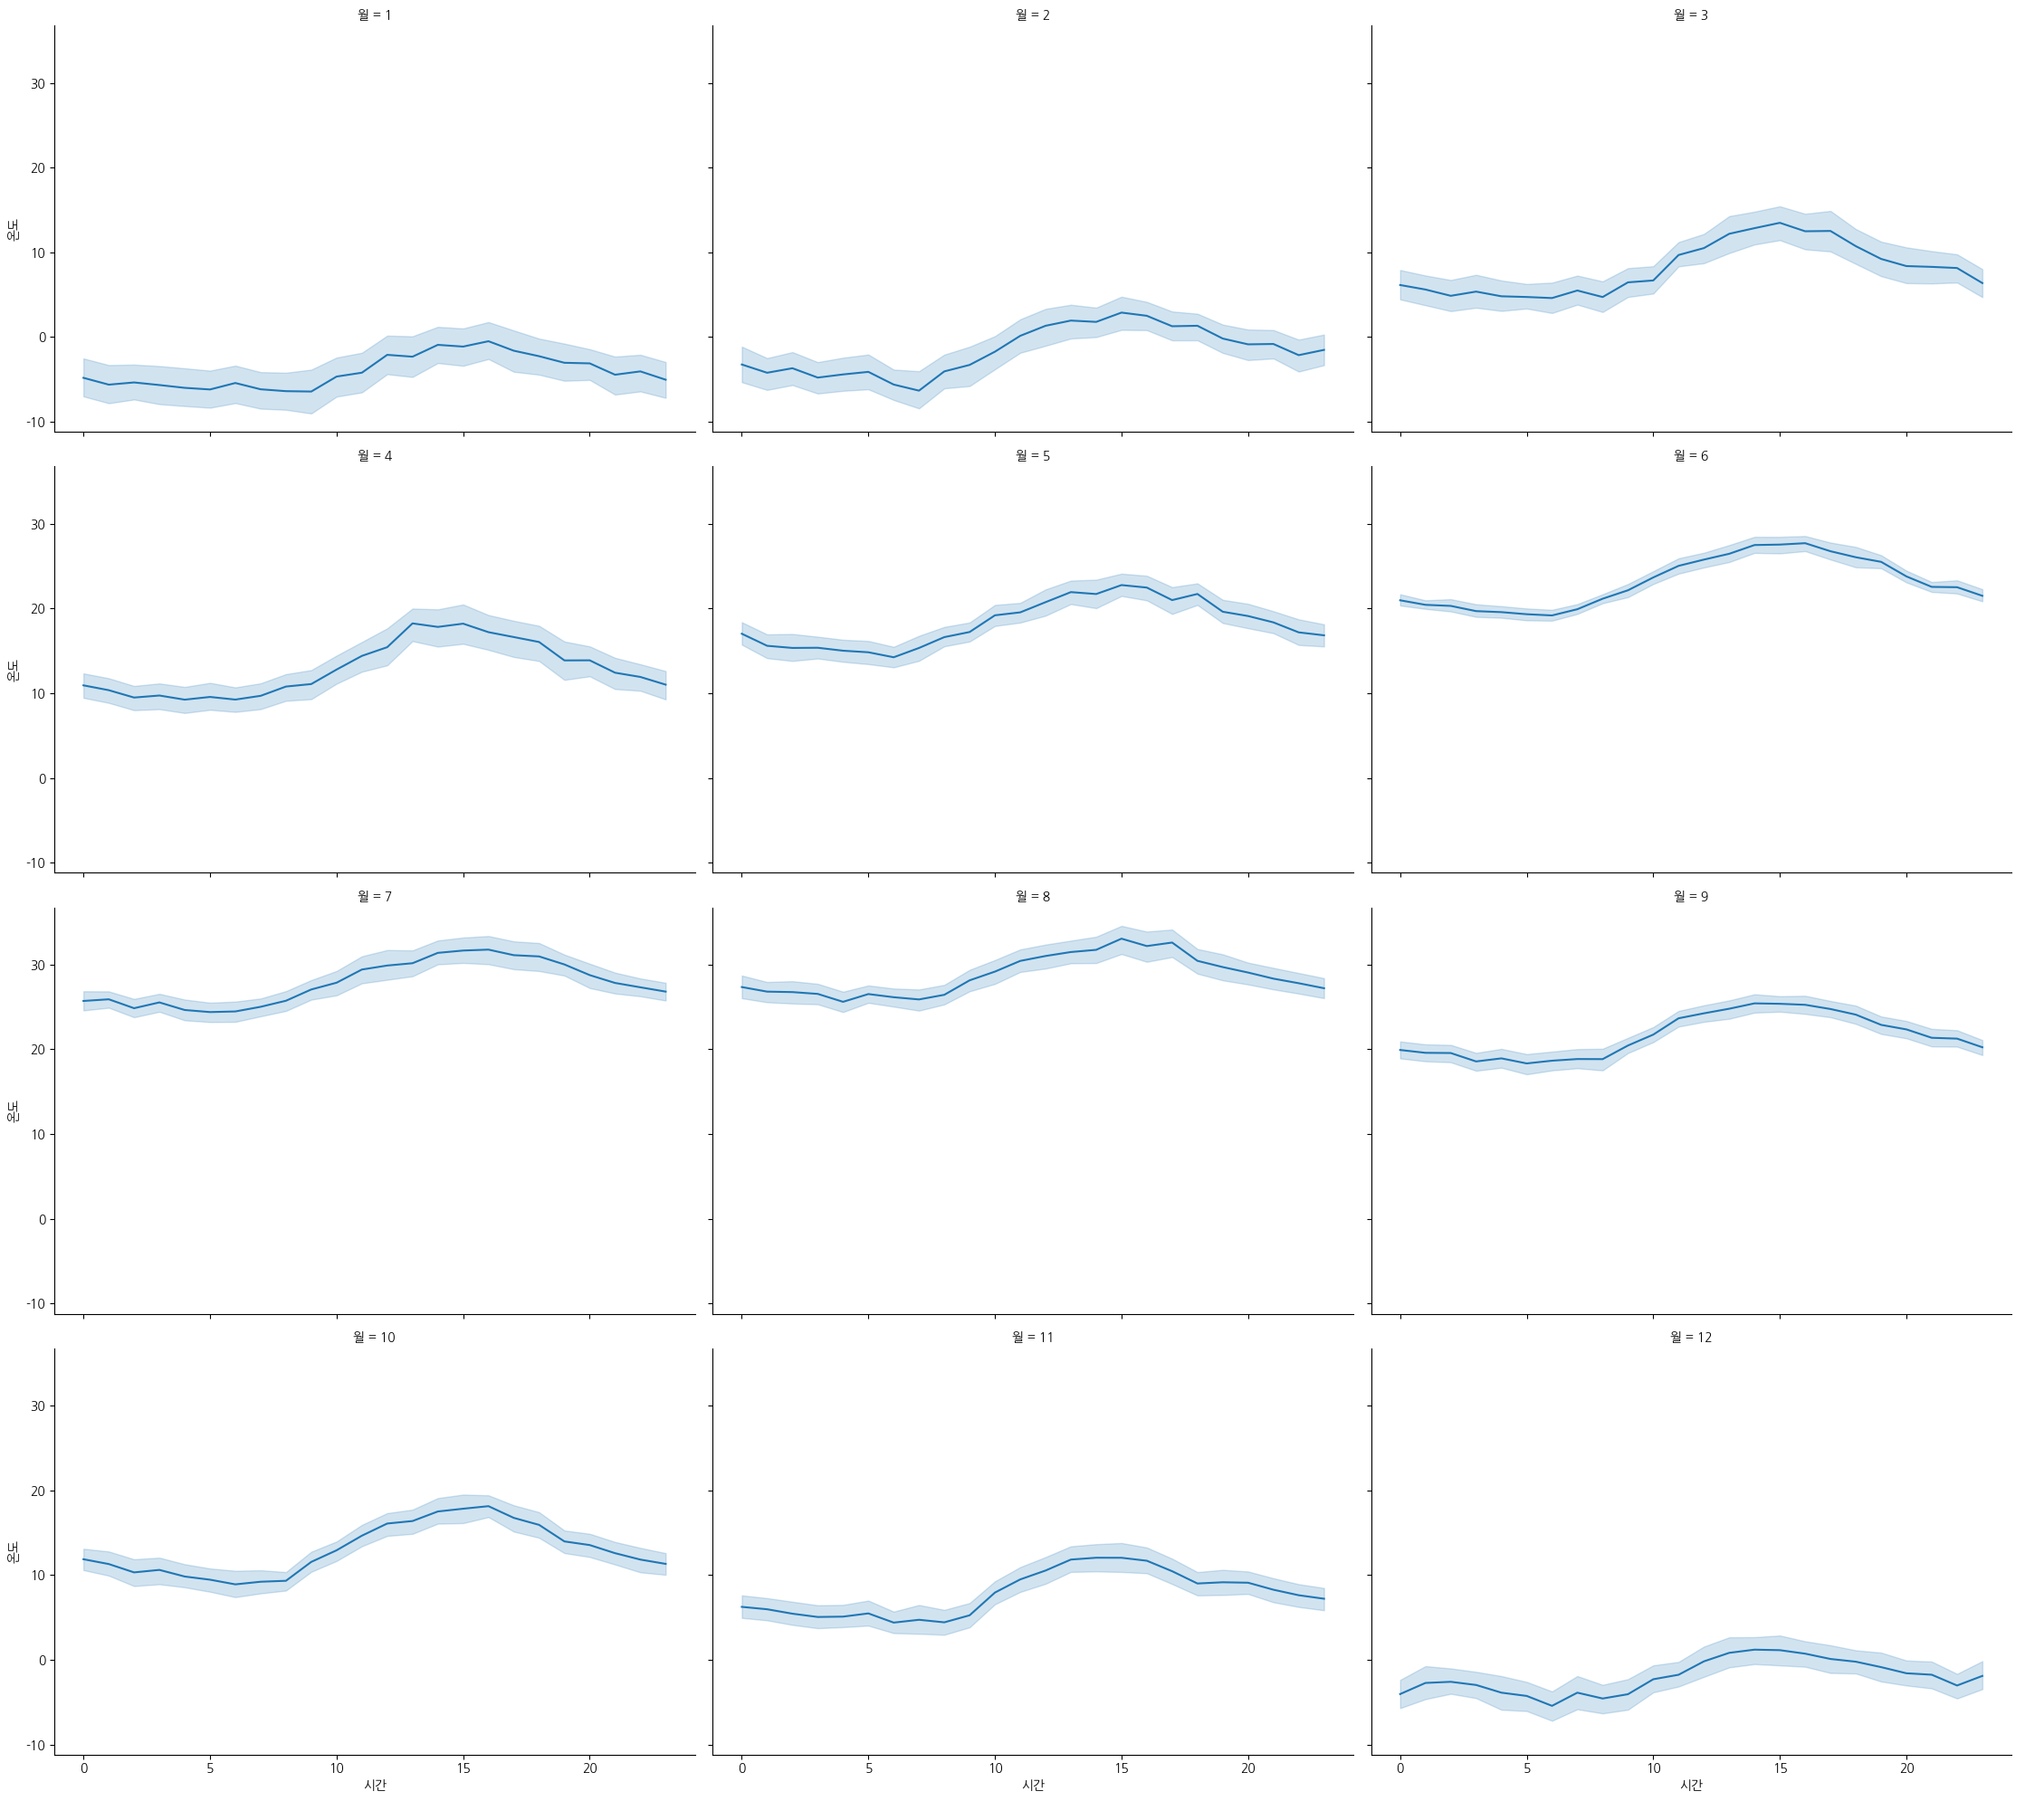

In [222]:
# FacetGrid 객체 생성
g = sns.FacetGrid(df, col="월", col_wrap=3, height=5, aspect=1.5)

# 각 서브플롯에 lineplot 적용
g.map(sns.lineplot, "시간", "온도")

# x,y 이름 정하기
g.set_axis_labels("시간", "온도")

#  내가 만든 서브플랏들을 적용하기
g.add_legend()

# 그래프 보여주기
plt.show()

데이터의 전체적인 모양에는 큰 변화가 없지만 좀 더 스무스해진 것을 볼 수 있다. 적절한 정도의 함수의 스무스함은 과적합을 예방 수 있다. 한 가지 추가적인 방법은 시계열 데이터이기에 시계열 인덱스를 고려하여 보간하는 방법이다.

In [223]:
df5 = df.set_index('날짜')
df5['온도'].interpolate(method='time', inplace=True)

### 풍속 결측치 채우기

풍속 결측치 역시 온도와 동일한 방식으로 진행해본다. 

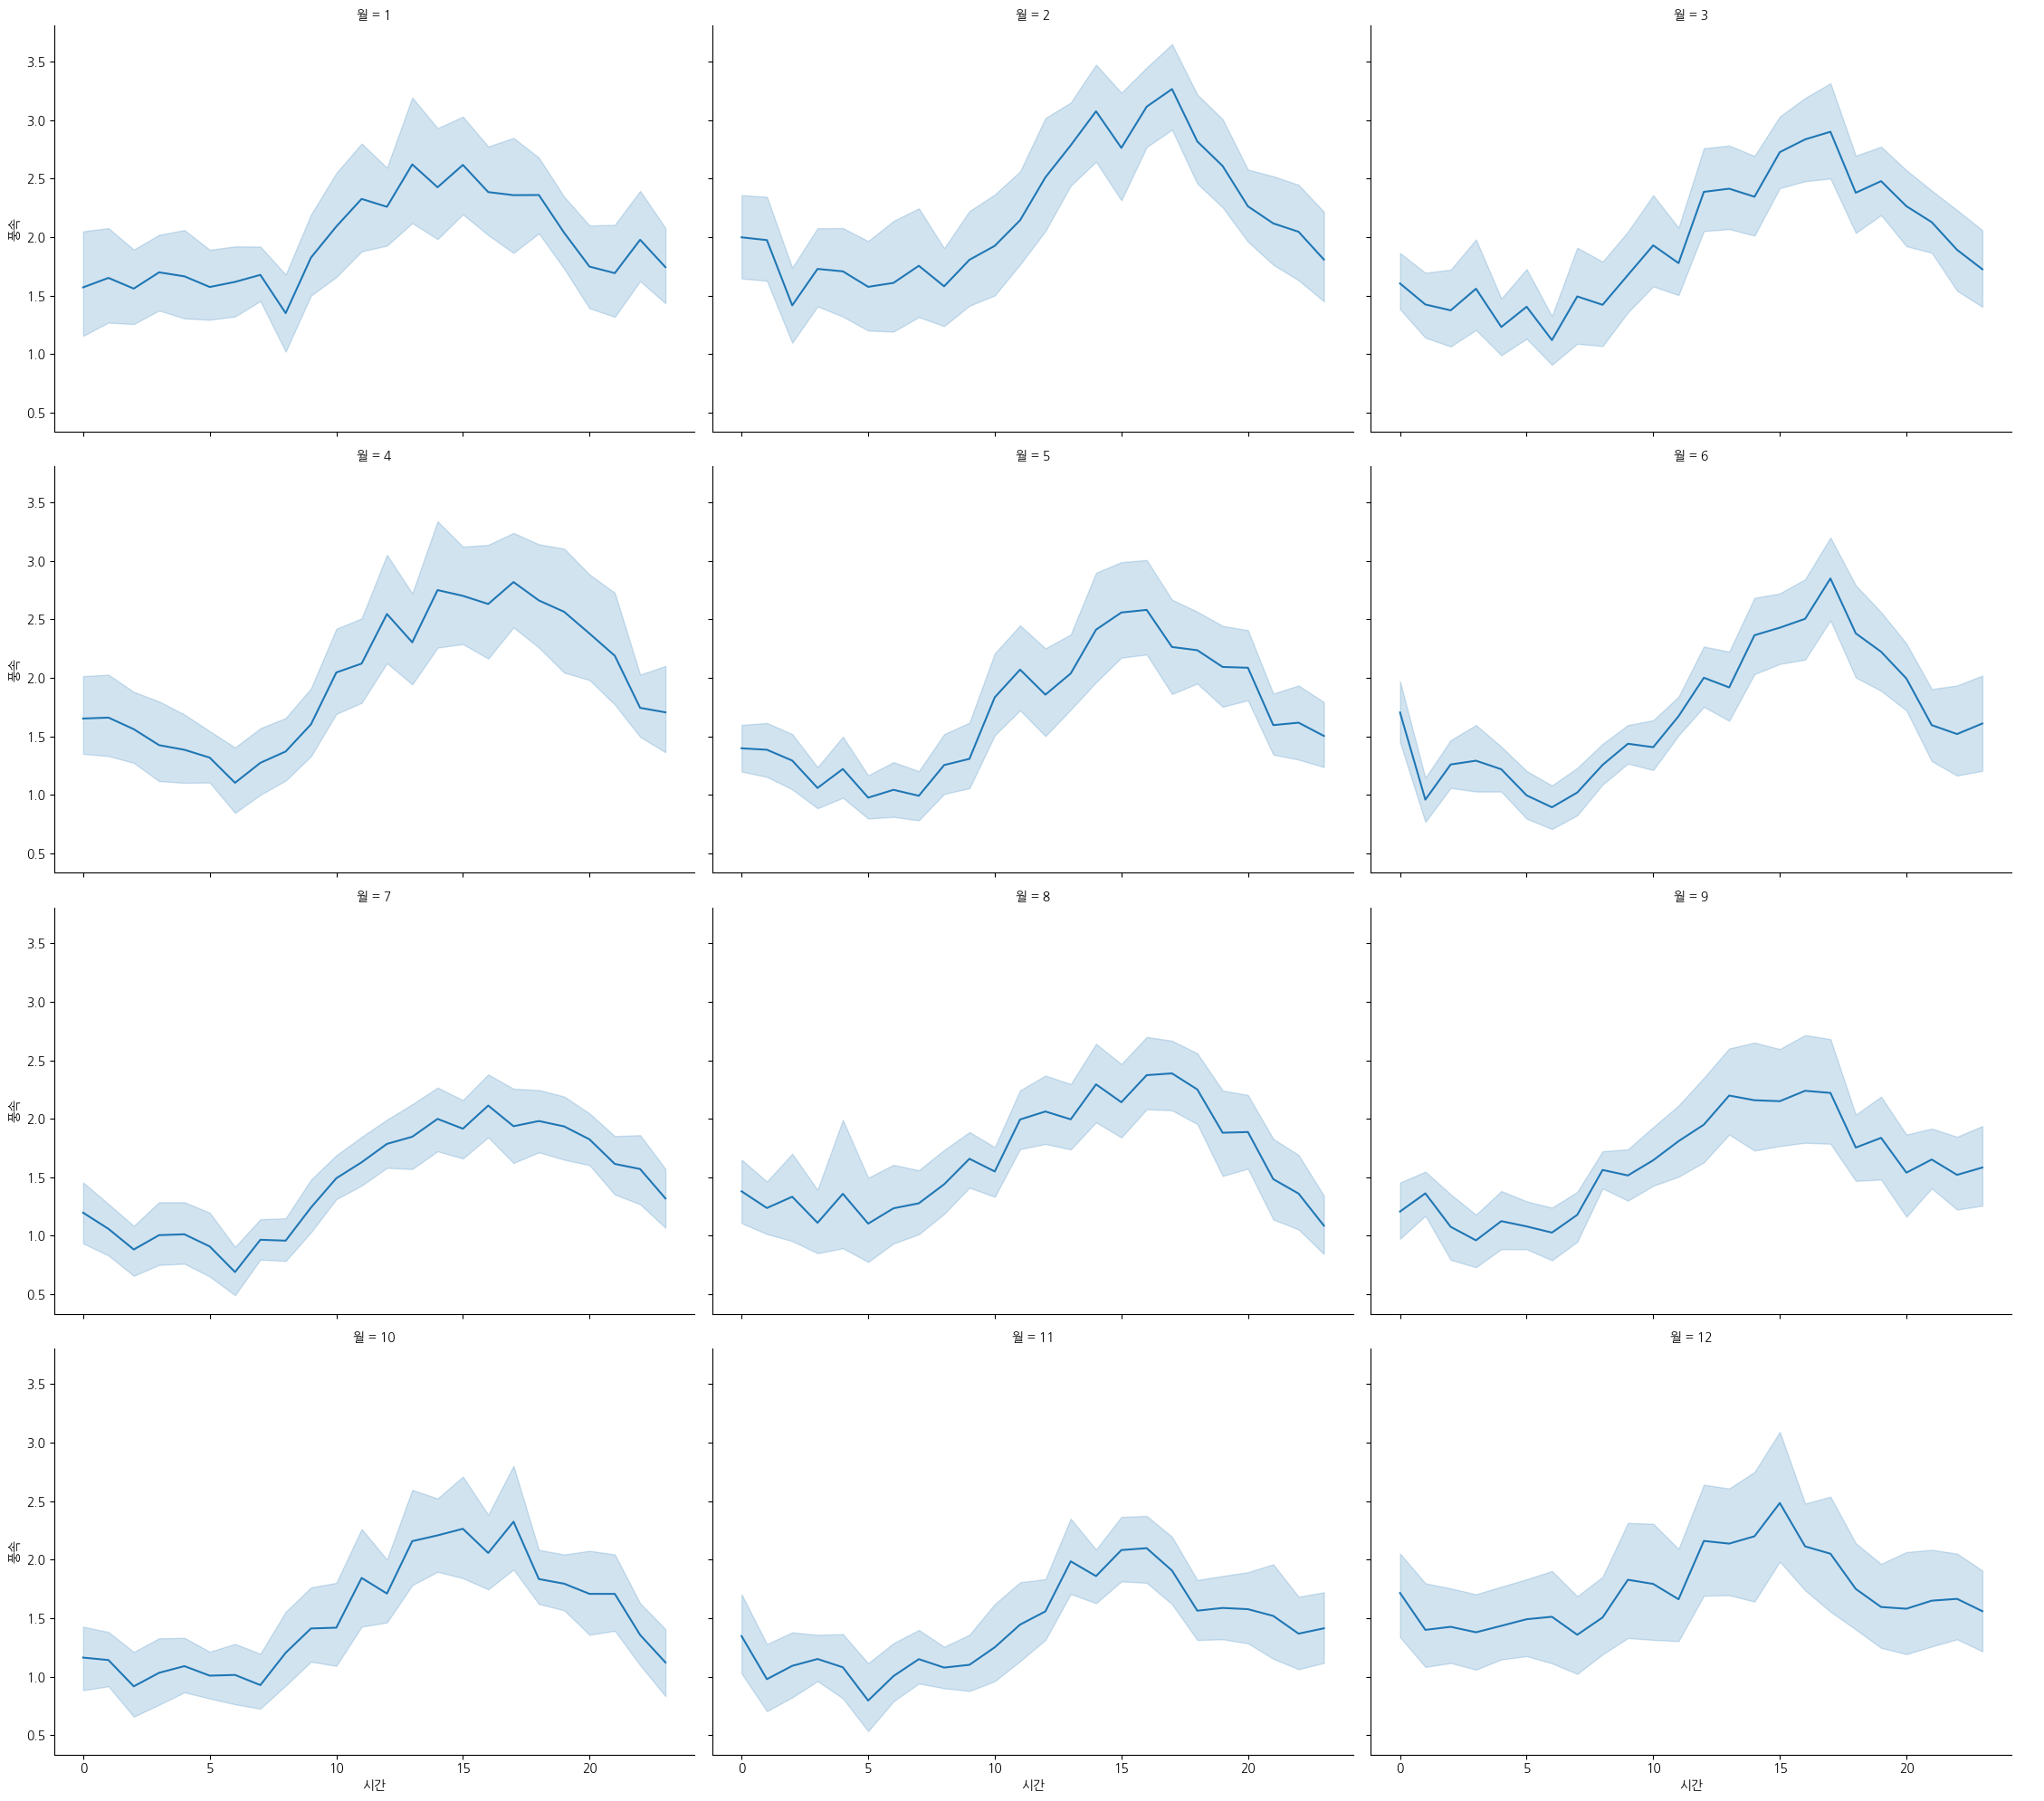

In [224]:
# FacetGrid 객체 생성
g = sns.FacetGrid(df, col="월", col_wrap=3, height=5, aspect=1.5)

# 각 서브플롯에 lineplot 적용
g.map(sns.lineplot, "시간", "풍속")

# x,y 이름 정하기
g.set_axis_labels("시간", "풍속")

#  내가 만든 서브플랏들을 적용하기
g.add_legend()

# 그래프 보여주기
plt.show()

함수의 모양이 크게 보면 극값이 2개인 3차함수의 모양처럼 보인다. 따라서 나는 3차 스플라인 보간법을 이용해서 풍속의 결측치를 처리하고자 한다.

In [225]:
df.풍속 = df.풍속.interpolate(method = 'spline', order = 3)
df.isna().sum()

날짜         0
자전거 대여량    0
시간         0
온도         0
습도         0
풍속         0
가시성        0
이슬점        0
태양복사       0
강수량        0
강설량        0
계절         0
공휴일        0
사용가능일      0
월          0
dtype: int64

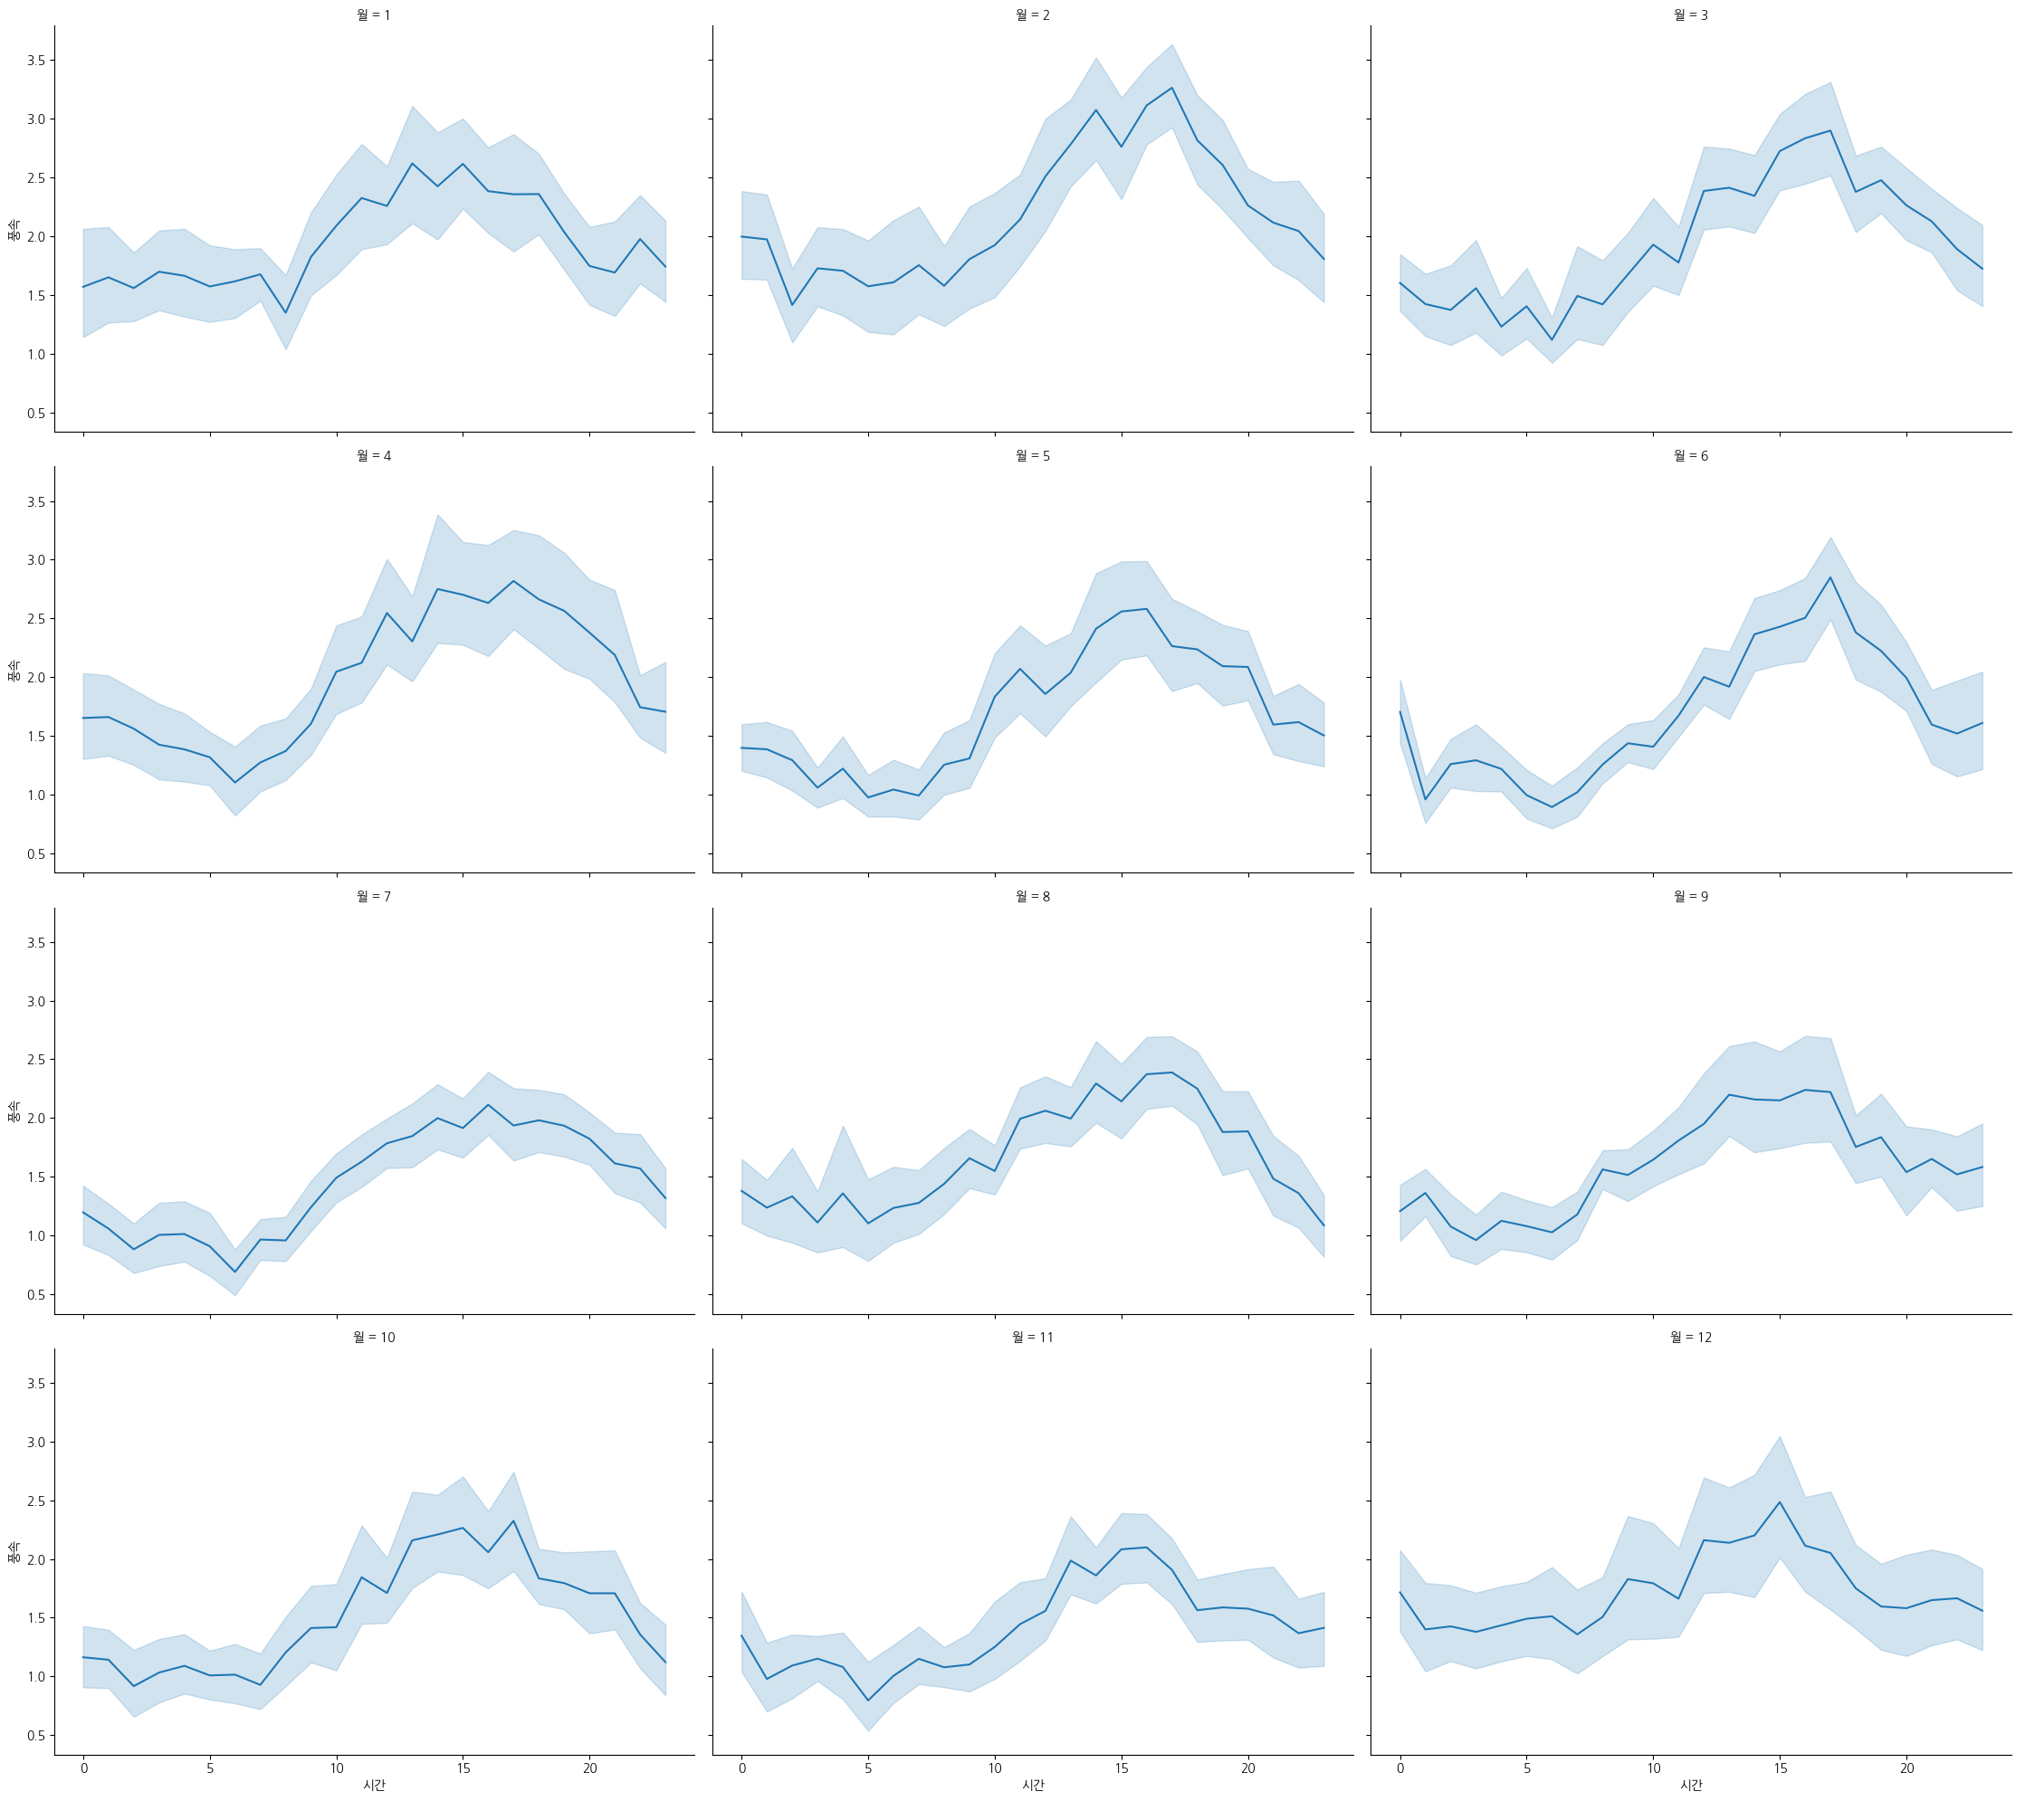

In [226]:
# FacetGrid 객체 생성
g = sns.FacetGrid(df, col="월", col_wrap=3, height=5, aspect=1.5)

# 각 서브플롯에 lineplot 적용
g.map(sns.lineplot, "시간", "풍속")

# x,y 이름 정하기
g.set_axis_labels("시간", "풍속")

#  내가 만든 서브플랏들을 적용하기
g.add_legend()

# 그래프 보여주기
plt.show()

온도만큼 함수 모형에 smooth에 관한 큰 변화가 보이지는 않는다.

## 변수 유형을 분석하기 좋은 유형으로 변경하기

### 변수 변환하기

그룹화 하였을 떄 의미있는 결과를 얻을 수 있는 변수들을 범주형 데이터로 타입변환해주려고 한다. 값 자체가 의미를 가진 게 아닌 변수들이 범주형 데이터로 변형하면 좋겠다는 생각을 했다.

In [227]:
print(df.시간.value_counts())
df.시간.astype('category')

시간
14    310
23    307
16    298
8     297
11    297
19    296
1     296
4     295
12    293
5     293
13    293
22    292
18    292
21    291
10    291
20    288
17    288
15    287
6     286
2     286
0     286
9     284
3     283
7     279
Name: count, dtype: int64


0        0
1        1
2        2
3        3
4        4
        ..
7003    17
7004    18
7005    19
7006    21
7007    22
Name: 시간, Length: 7008, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [228]:
df.공휴일.value_counts()
df.공휴일.astype('category')

0       No Holiday
1       No Holiday
2       No Holiday
3       No Holiday
4       No Holiday
           ...    
7003    No Holiday
7004    No Holiday
7005    No Holiday
7006    No Holiday
7007    No Holiday
Name: 공휴일, Length: 7008, dtype: category
Categories (2, object): ['Holiday', 'No Holiday']

In [229]:
print(df.사용가능일.value_counts())
df.사용가능일.astype('category')

사용가능일
Yes    6772
No      236
Name: count, dtype: int64


0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7003    Yes
7004    Yes
7005    Yes
7006    Yes
7007    Yes
Name: 사용가능일, Length: 7008, dtype: category
Categories (2, object): ['No', 'Yes']

In [230]:
df.계절.astype('category')

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
7003    Autumn
7004    Autumn
7005    Autumn
7006    Autumn
7007    Autumn
Name: 계절, Length: 7008, dtype: category
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']

In [231]:
df.시간.astype('category')

0        0
1        1
2        2
3        3
4        4
        ..
7003    17
7004    18
7005    19
7006    21
7007    22
Name: 시간, Length: 7008, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

시간을 카테고리화 하는 것에는 조금 고민을 했는데 시간 자체의 값이 커지고 작아지는 것이 예측에 영향을 끼치는 것이 아니라 시간이 오후 시간대인지 출퇴근 시간대인지 분리하여 판단하고 가설을 세우고 가설을 확인하기 때문에 범주형 데이터로 바꾸는 것이 좋겠다는 생각을 해서 범주형 변수로 바꿔주었다.

## 이상치 확인하기

In [232]:
print(df.태양복사.value_counts())
print(df.강수량.value_counts())
print(df.강설량.value_counts())
print(df.온도.value_counts())
print(df.풍속.value_counts())
print(df.습도.value_counts())
print(df.이슬점.value_counts())

태양복사
0.00    3430
0.01     103
0.02      63
0.03      53
0.06      50
        ... 
3.35       1
2.43       1
3.32       1
2.97       1
2.76       1
Name: count, Length: 343, dtype: int64
강수량
0.0     6588
0.5       94
1.0       50
1.5       45
0.1       34
2.0       27
2.5       19
0.2       16
3.5       15
4.0       12
0.4       12
3.0       11
6.0        6
0.3        6
5.5        5
5.0        5
9.5        5
4.5        5
6.5        4
8.0        3
0.8        3
7.0        3
1.6        2
18.5       2
13.0       2
6.4        2
18.0       2
13.5       2
14.5       1
4.9        1
21.5       1
12.0       1
1.3        1
7.5        1
16.0       1
8.5        1
1.2        1
7.3        1
29.5       1
9.1        1
0.9        1
10.5       1
5.4        1
12.5       1
10.0       1
19.0       1
35.0       1
1.9        1
17.0       1
9.0        1
3.7        1
1.4        1
3.3        1
1.1        1
0.7        1
1.8        1
Name: count, dtype: int64
강설량
0.0    6652
0.3      34
1.0      31
0.9      28
0.7

value_count 함수만을 사용해서 본 것으로는 min,max 값에 눈에 띄는 이상함은 없다. 하지만 강수량,강설량,습도,태양 복사에 눈에 띄게 많은 0이 있어서 따로 확인한다. 지난주에 진행한 결과 습도만이 문제가 있는 값이었어서 일단 습도만 처리한다.

In [233]:
df.loc[(df['날짜'] == '2018-05-21') & (df['습도'] == 0),'습도']= round(df[df['날짜']=='2018-05-21'].loc[df['습도']!=0,'습도'].mean(),0)
df.loc[(df['날짜'] == '2018-05-22') & (df['습도'] == 0),'습도']= round(df[df['날짜']=='2018-05-22'].loc[df['습도']!=0,'습도'].mean(),0)
df.loc[(df['날짜'] == '2018-05-27') & (df['습도'] == 0),'습도']= round(df[df['날짜']=='2018-05-27'].loc[df['습도']!=0,'습도'].mean(),0)
df.loc[(df['날짜'] == '2018-05-28') & (df['습도'] == 0),'습도']= round(df[df['날짜']=='2018-05-28'].loc[df['습도']!=0,'습도'].mean(),0)

In [234]:
print(df.습도.value_counts())

습도
97    138
43    137
47    132
57    131
53    131
     ... 
18      8
19      8
13      3
10      1
12      1
Name: count, Length: 88, dtype: int64


이상치를 탐색하기 가장 단순한 방법인 박스플롯을 이용해서 이상치를 확인한다.

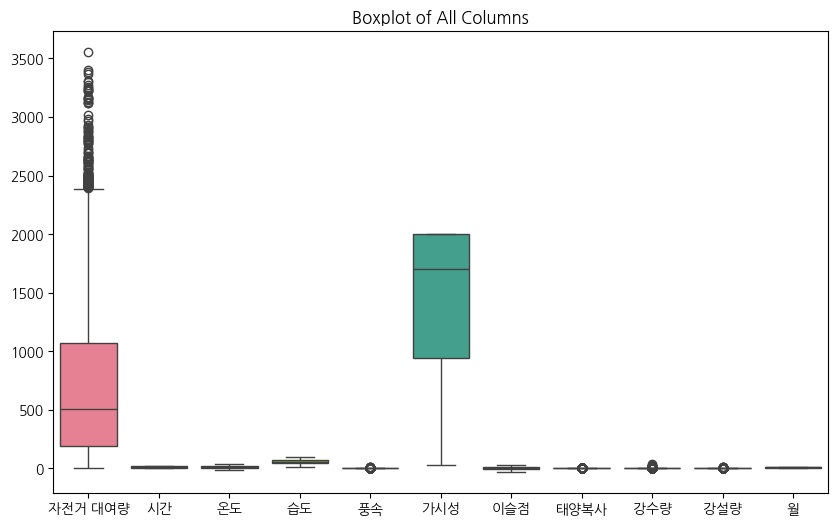

In [235]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of All Columns')
plt.show()

## 자전거 대여량

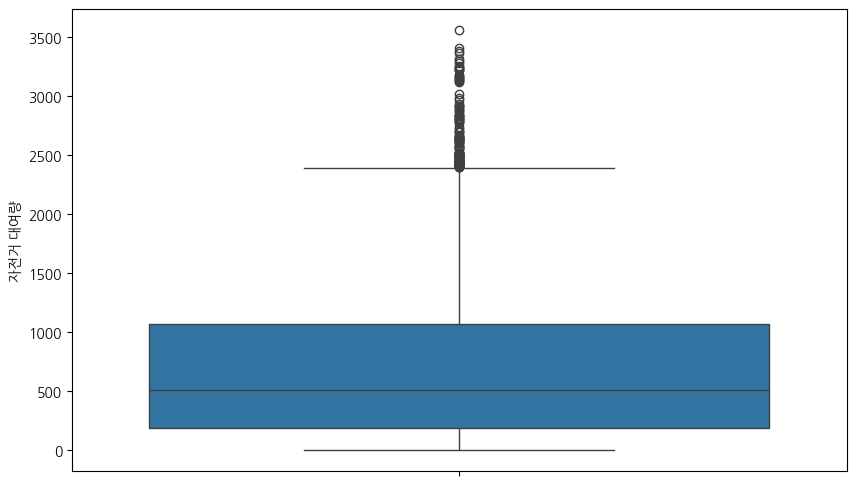

In [302]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['자전거 대여량'])
plt.show()

In [320]:
Q1 = df['자전거 대여량'].quantile(0.25)
Q3 = df['자전거 대여량'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 +IQR*1.5
lower = Q1-IQR*1.5
df[df['자전거 대여량'] > upper]['계절'].value_counts()

계절
Summer    66
Autumn    30
Spring    27
Name: count, dtype: int64

In [321]:
df[df['자전거 대여량'] > upper]['시간'].value_counts()

시간
18    66
19    32
20    13
17     4
21     4
16     2
8      2
Name: count, dtype: int64

<Axes: xlabel='시간', ylabel='자전거 대여량'>

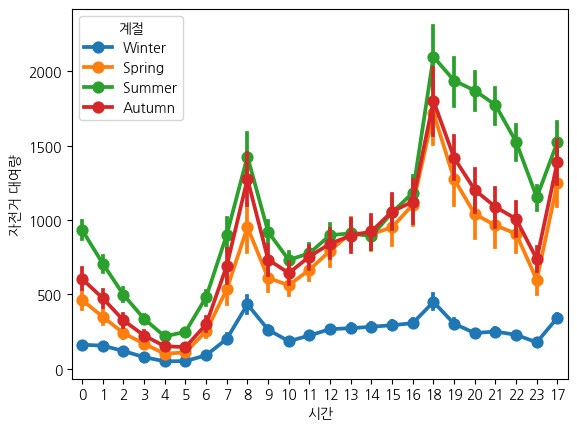

In [303]:
sns.pointplot(data=df, x='시간', y='자전거 대여량', hue='계절')

In [322]:
df['계절'].value_counts()

계절
Summer    1771
Autumn    1760
Winter    1750
Spring    1727
Name: count, dtype: int64

In [323]:
df['시간'].value_counts()

시간
14    310
23    307
16    298
8     297
11    297
19    296
1     296
4     295
12    293
5     293
13    293
22    292
18    292
21    291
10    291
20    288
17    288
15    287
6     286
2     286
0     286
9     284
3     283
7     279
Name: count, dtype: int64

자전거 대여량의 이상치는 여름에서 반이상 일어나는 것을 확인할 수 있다. 그리고 대부분이 퇴근 시간에 일어나는 것을 볼 수 있다. 전체 계절의 갯수로는 설명하기 어렵지만 시간별 빈도를 보면 퇴근 시간인 18과20의 갯수가 비교적 적은 것을 확인할 수 있다. 이러한 이유 때문에 가질 수 있는 자전거 대여량의 값이 이상치로 나온 것으로 나는 생각한다. 그러므로 자전거 대여량이 많은 계절인 여름과 자전거 대여량이 많은 퇴근 시간이 겹쳐서 나타난 현상으로 판단하여 이상치가 아닌 것으로 생각하고 진행하기로 하였다.

자전거 대여량에는 현재 그래프로도 뚜렷한 이상치가 보인다. 하지만 다른 변수들은 확인이 어려우니 각자 그려본다.

### 시간

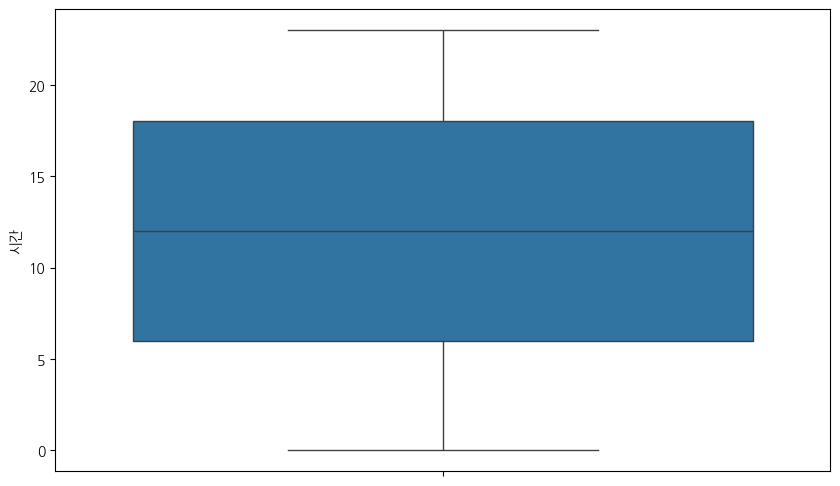

In [236]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['시간'])
plt.show()

### 온도

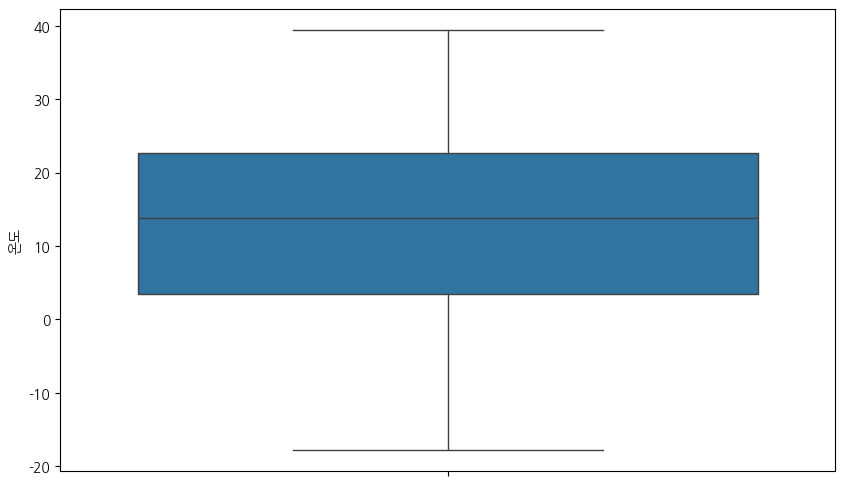

In [237]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['온도'])
plt.show()

### 풍속

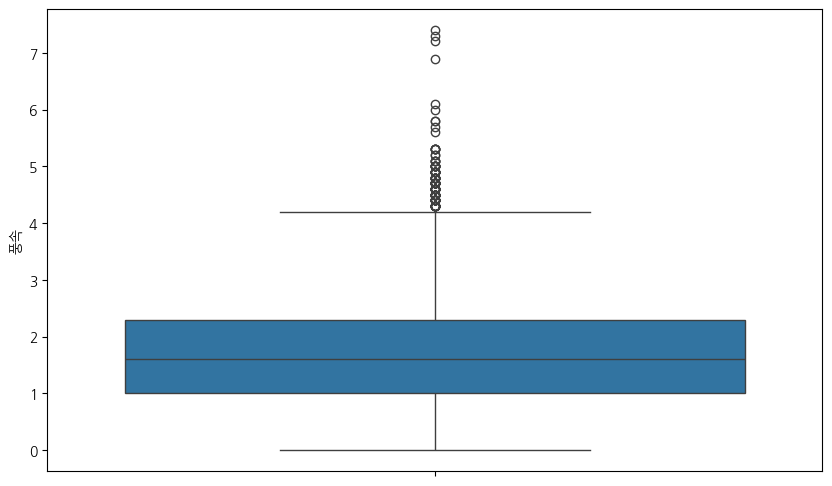

In [238]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['풍속'])
plt.show()

IQR을 기준으로 이상치를 탐색한다.

In [244]:
Q1 = df['풍속'].quantile(0.25)
Q3 = df['풍속'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 +IQR*1.5
lower = Q1-IQR*1.5
df[df['풍속'] > upper] # 129

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일,월
71,2017-12-04,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,Winter,No Holiday,Yes,12
73,2017-12-04,338,14,0.1,27,4.5,2000,-16.7,1.09,0.0,0.0,Winter,No Holiday,Yes,12
74,2017-12-04,341,15,-0.1,25,5.8,2000,-17.8,0.88,0.0,0.0,Winter,No Holiday,Yes,12
76,2017-12-04,515,17,-1.3,26,5.3,2000,-18.3,0.18,0.0,0.0,Winter,No Holiday,Yes,12
78,2017-12-04,397,21,-4.6,43,4.5,2000,-15.3,0.00,0.0,0.0,Winter,No Holiday,Yes,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,2018-10-27,1183,14,10.8,37,4.4,2000,-3.3,1.29,0.0,0.0,Autumn,No Holiday,Yes,10
6337,2018-10-27,1176,17,9.5,34,5.7,2000,-5.6,0.45,0.0,0.0,Autumn,No Holiday,Yes,10
6377,2018-10-29,1274,17,10.0,43,4.9,2000,-2.0,0.43,0.0,0.0,Autumn,No Holiday,Yes,10
6593,2018-11-09,0,10,11.3,68,4.7,1984,5.5,0.44,0.0,0.0,Autumn,No Holiday,No,11


In [ ]:
print(df['풍속'].max())

![Sample Image](https://search.pstatic.net/sunny/?src=https%3A%2F%2Fcdn.ppomppu.co.kr%2Fzboard%2Fdata3%2F2023%2F0503%2F20230503113702_C0DMOGdxWK.png&type=sc960_832)

데이터를 확인하니 풍속은 현재 그래프 범위 내에서 값을 가질 수 있다. 

### 가시성

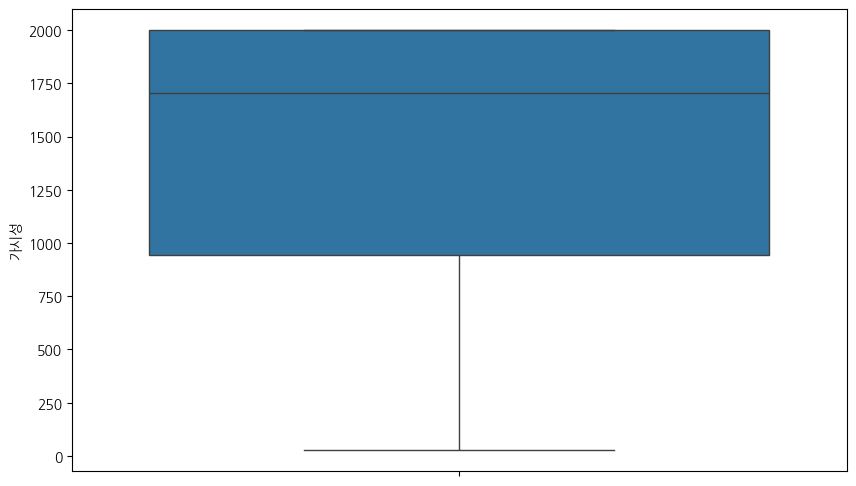

In [245]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['가시성'])
plt.show()

### 이슬점

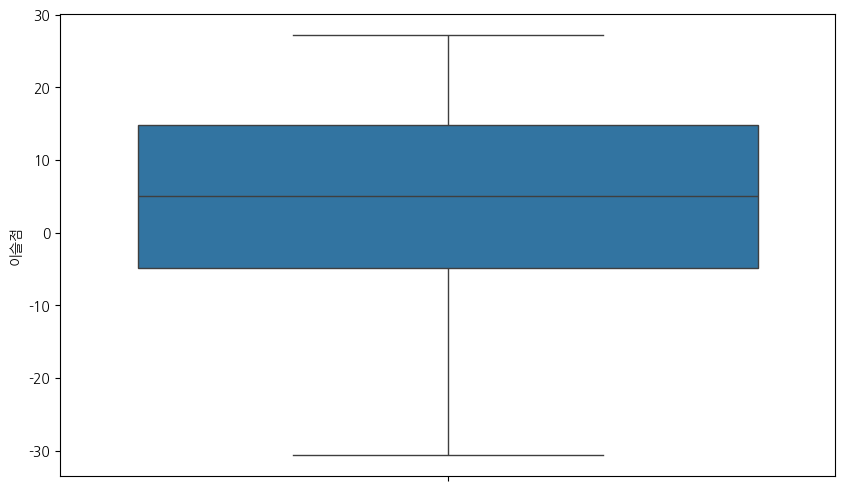

In [246]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['이슬점'])
plt.show()

In [324]:
df = df.drop('월',axis=1)

In [272]:
df

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,1.580633,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.100000,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
7004,2018-11-30,1384,18,4.7,34,1.900000,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
7005,2018-11-30,1003,19,4.2,34,2.600000,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
7006,2018-11-30,694,21,2.6,39,0.300000,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       7008 non-null   datetime64[ns]
 1   자전거 대여량  7008 non-null   int64         
 2   시간       7008 non-null   object        
 3   온도       7008 non-null   float64       
 4   습도       7008 non-null   int64         
 5   풍속       7008 non-null   float64       
 6   가시성      7008 non-null   int64         
 7   이슬점      7008 non-null   float64       
 8   태양복사     7008 non-null   float64       
 9   강수량      7008 non-null   float64       
 10  강설량      7008 non-null   float64       
 11  계절       7008 non-null   object        
 12  공휴일      7008 non-null   object        
 13  사용가능일    7008 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(4)
memory usage: 766.6+ KB


# 2차 전처리

One-Hot Encoding 과 Label Encoding 중에서 각 변수를 어떤 방식으로 수치화할 지 생각을 해보았다. 계절은 각 계절에 선순위가 없기 때문에 원핫을 선택했다. 공휴일 역시도 공휴일인지 아닌지가 예측에 영향을 끼치는 것이지 그 둘 사이에 순위가 없기때문에 원핫을 선택했다. 또한 사용가능일 역시도 사용이 가능하고 가능하지 않은 것이지 둘 사이의 순위가 없다고 생각해서 원핫을 선택했다. 시간 역시도 시간자체들이 순위를 가지지 않다고 생각했기에 원핫을 선택했다. 따라서 나는 따릉이 데이터에는 라벨 인코딩을 사용할 변수가 없다고 판단했다.

### 데이터프레임 사용하기

In [ ]:
#df_dummy = pd.get_dummies(df[['계절','시간','사용가능일','공휴일']])
#df_dummy

이렇게 진행하면 시간은 더미변수화가 안되는 것을 확인할 수 있다. 시간이 int type으로 되어있어서 생긴 문제라서  str 변경해준다. 또한 true 와 false로 표현되는데 후에 문제를 푸는데는 문제가 없다.

In [274]:
df['시간'] = df['시간'].astype(str)
df_dummy = pd.get_dummies(df[['계절','시간','사용가능일','공휴일']])
df_dummy

,계절_Autumn,계절_Spring,계절_Summer,계절_Winter,시간_0,시간_1,시간_10,시간_11,시간_12,시간_13,...,시간_4,시간_5,시간_6,시간_7,시간_8,시간_9,사용가능일_No,사용가능일_Yes,공휴일_Holiday,공휴일_No Holiday
0,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
7004,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
7005,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
7006,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [275]:
df

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,강설량,계절,공휴일,사용가능일
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,1.580633,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.100000,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
7004,2018-11-30,1384,18,4.7,34,1.900000,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
7005,2018-11-30,1003,19,4.2,34,2.600000,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
7006,2018-11-30,694,21,2.6,39,0.300000,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [276]:
#더미변수들을 데이터프레임에 합침
df_v1 = df.copy()

df_v1 = pd.concat([df_v1, df_dummy], axis=1) # 데이터프레임을 합치는 코드
df_v1

,날짜,자전거 대여량,시간,온도,습도,풍속,가시성,이슬점,태양복사,강수량,...,시간_4,시간_5,시간_6,시간_7,시간_8,시간_9,사용가능일_No,사용가능일_Yes,공휴일_Holiday,공휴일_No Holiday
0,2017-12-01,254,0,-5.2,37,2.200000,2000,-17.6,0.00,0.0,...,False,False,False,False,False,False,False,True,False,True
1,2017-12-01,204,1,-5.5,38,0.800000,2000,-17.6,0.00,0.0,...,False,False,False,False,False,False,False,True,False,True
2,2017-12-01,173,2,-6.0,39,1.000000,2000,-17.7,0.00,0.0,...,False,False,False,False,False,False,False,True,False,True
3,2017-12-01,107,3,-6.2,40,0.900000,2000,-17.6,0.00,0.0,...,False,False,False,False,False,False,False,True,False,True
4,2017-12-01,78,4,-6.0,36,1.580633,2000,-18.6,0.00,0.0,...,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.100000,1877,-10.7,0.23,0.0,...,False,False,False,False,False,False,False,True,False,True
7004,2018-11-30,1384,18,4.7,34,1.900000,1661,-9.8,0.00,0.0,...,False,False,False,False,False,False,False,True,False,True
7005,2018-11-30,1003,19,4.2,34,2.600000,1894,-10.3,0.00,0.0,...,False,False,False,False,False,False,False,True,False,True
7006,2018-11-30,694,21,2.6,39,0.300000,1968,-9.9,0.00,0.0,...,False,False,False,False,False,False,False,True,False,True


### 원핫 인코더 사용하기

In [277]:
ohe = OneHotEncoder(sparse_output=False)

result_ohe = ohe.fit_transform(df[['계절','시간','사용가능일','공휴일']])
result_ohe

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [278]:
ohe.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
        '19', '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8',
        '9'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object)]

In [279]:
# 메모리를 비교적 적게 사용해서 메모리 사용에 효율적인 uint8 타입으로 변수 타입을 바꿔준다.
df_ohe = pd.DataFrame(result_ohe,columns = ohe.get_feature_names_out(['계절','시간','사용가능일','공휴일'])).astype('uint8')
df_ohe

,계절_Autumn,계절_Spring,계절_Summer,계절_Winter,시간_0,시간_1,시간_10,시간_11,시간_12,시간_13,...,시간_4,시간_5,시간_6,시간_7,시간_8,시간_9,사용가능일_No,사용가능일_Yes,공휴일_Holiday,공휴일_No Holiday
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7004,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7006,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [280]:
df_v2 = pd.concat([df, df_ohe], axis=1)

In [281]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   날짜              7008 non-null   object 
 1   자전거 대여량         7008 non-null   int64  
 2   시간              7008 non-null   object 
 3   온도              7008 non-null   float64
 4   습도              7008 non-null   int64  
 5   풍속              7008 non-null   float64
 6   가시성             7008 non-null   int64  
 7   이슬점             7008 non-null   float64
 8   태양복사            7008 non-null   float64
 9   강수량             7008 non-null   float64
 10  강설량             7008 non-null   float64
 11  계절              7008 non-null   object 
 12  공휴일             7008 non-null   object 
 13  사용가능일           7008 non-null   object 
 14  계절_Autumn       7008 non-null   uint8  
 15  계절_Spring       7008 non-null   uint8  
 16  계절_Summer       7008 non-null   uint8  
 17  계절_Winter       7008 non-null   u

필요없는 열 제거하기

In [282]:
df_fin = df_v2.drop(['시간','계절','공휴일','사용가능일'],axis=1)
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   날짜              7008 non-null   object 
 1   자전거 대여량         7008 non-null   int64  
 2   온도              7008 non-null   float64
 3   습도              7008 non-null   int64  
 4   풍속              7008 non-null   float64
 5   가시성             7008 non-null   int64  
 6   이슬점             7008 non-null   float64
 7   태양복사            7008 non-null   float64
 8   강수량             7008 non-null   float64
 9   강설량             7008 non-null   float64
 10  계절_Autumn       7008 non-null   uint8  
 11  계절_Spring       7008 non-null   uint8  
 12  계절_Summer       7008 non-null   uint8  
 13  계절_Winter       7008 non-null   uint8  
 14  시간_0            7008 non-null   uint8  
 15  시간_1            7008 non-null   uint8  
 16  시간_10           7008 non-null   uint8  
 17  시간_11           7008 non-null   u

# valid,train 셋 분리

input과 output 구분하기

In [283]:
x = df_fin.drop('자전거 대여량',axis=1)
y = df_fin['자전거 대여량']

In [289]:
# 타이타닉 데이터와는 다르게 y값이 연속형이기 때문에 stratify 사용하지 않기
x_train, x_valid, y_train, y_valid = train_test_split(x,y,train_size = 0.8,test_size = 0.2, random_state=100 )
print(x_tranin.shape, y_train.shape, x_valid.shape, y_valid.shape)

(5606, 41) (5606,) (1402, 41) (1402,)


# 변수 스케일링

사실 우리 조가 할당 받은 모델인 GBM은 트리기반 모델이기에 변수 스케일링이 필수적이지 않다.

날짜 변수는 스케일할 수 있는 단위가 아니므로 제외하고 진행한다. 후에 다시 x_train과 x_valid에 추가해주기로 한다.

In [325]:
x_train_date = x_train['날짜']
x_valid_date = x_valid['날짜']
x_train_bs = x_train.drop('날짜',axis=1)
x_valid_bs = x_valid.drop('날짜',axis=1)

## Standard Scaler

In [292]:
ss = StandardScaler()

x_train_ss = ss.fit_transform(x_train_bs) #모델 학습시키고 적용하기
x_val_ss = ss.transform(x_valid_bs) # train data만 fit을 사용함 valid,test는 train에 fit된대로 scale되어야함

print("<train 셋>")
print(f'평균: {x_train_ss.mean()}\n분산: {x_train_ss.std()}')
print("<valid 셋>")
print(f'평균: {x_val_ss.mean()}\n분산: {x_val_ss.std()}')


<train 셋>
평균: 6.780955469704845e-18
분산: 1.0
<valid 셋>
평균: 0.00304058504236137
분산: 1.0145635092857799


## MinMax Scaler

In [299]:
mms = MinMaxScaler()

x_train_mms = mms.fit_transform(x_train_bs)
x_val_mms = mms.transform(x_valid_bs) 

print("<train 셋>")
print(f'최대: {x_train_mms.max()}\n최소: {x_train_mms.min()}')
print("<valid 셋>")
print(f'최대: {x_val_mms.max()}\n최소: {x_val_mms.min()}')

<train 셋>
최대: 1.0000000000000002
최소: 0.0
<valid 셋>
최대: 1.0
최소: -0.005272407732864692


## MaxAbs Scaler

In [300]:
mas = MaxAbsScaler()

x_train_mas = mas.fit_transform(x_train_bs)
x_val_mas = mas.transform(x_valid_bs) 

print("<train 셋>")
print(f'최대: {x_train_mas.max()}\n최소: {x_train_mas.min()}')
print("<valid 셋>")
print(f'최대: {x_val_mas.max()}\n최소: {x_val_mas.min()}')

<train 셋>
최대: 1.0
최소: -1.0
<valid 셋>
최대: 1.0
최소: -0.9640522875816993


## Robust Scaler

In [301]:
rs = RobustScaler()

x_train_rs = rs.fit_transform(x_train_bs) #모델 학습시키고 적용하기
x_val_rs = rs.transform(x_valid_bs) # train data만 fit을 사용함 valid,test는 train에 fit된대로 scale되어야함

print("<train 셋>")
print(f'평균: {x_train_rs.mean()}\n분산: {x_train_rs.std()}')
print("<valid 셋>")
print(f'평균: {x_val_rs.mean()}\n분산: {x_val_rs.std()}')

<train 셋>
평균: 0.06503701577761924
분산: 0.4119608321438544
<valid 셋>
평균: 0.06747916042976634
분산: 0.44087765159837805
